In [262]:
#packages import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
from sklearn.metrics import confusion_matrix,classification_report

In [265]:
from sklearn.svm import SVC

In [266]:
#collecting data
matches=pd.read_csv("WorldCupMatches.csv")

In [267]:
cups=pd.read_csv("WorldCups.csv")

In [268]:
len(matches.index)

4572

In [269]:
len(cups.index)

20

In [270]:
matches=matches.dropna()

In [271]:
cups=cups.dropna()

In [272]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [273]:
cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


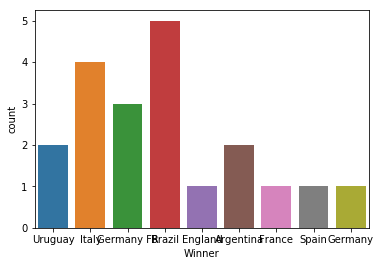

In [274]:
#no of world cup champion
sns.countplot(cups['Winner'])

In [275]:
#create a dictionary of football teams
#rename Germany DR and Germany fr by germany
#replace soviet union by russia
def replace_name(df):
    if(df["Home Team Name"] in ["German DR","Germany FR"]):
        df["Home Team Name"]="Germany"
    elif(df["Home Team Name"] in ["Soviet Union"]):
        df["Home Team Name"]="Russia"
    elif(df["Away Team Name"] in ["German DR","Germany FR"]):
        df["Away Team Name"]="Germany"    
    elif(df["Away Team Name"] in ["German DR","Germany FR"]):
        df["Away Team Name"]="Russia"
    return df
matches=matches.apply(replace_name,axis="columns")

In [276]:
team_name={}
index=0
for ind,row in matches.iterrows():
    name=row["Home Team Name"]
    if(name not in team_name.keys()):
        team_name[name]=index
        index+=1
    name=row['Away Team Name']
    if(name not in team_name.keys()):
        team_name[name]=index
        index+=1
team_name        

{'France': 0,
 'Mexico': 1,
 'USA': 2,
 'Belgium': 3,
 'Yugoslavia': 4,
 'Brazil': 5,
 'Romania': 6,
 'Peru': 7,
 'Argentina': 8,
 'Chile': 9,
 'Bolivia': 10,
 'Paraguay': 11,
 'Uruguay': 12,
 'Austria': 13,
 'Hungary': 14,
 'Egypt': 15,
 'Switzerland': 16,
 'Netherlands': 17,
 'Sweden': 18,
 'Germany': 19,
 'Spain': 20,
 'Italy': 21,
 'Czechoslovakia': 22,
 'Dutch East Indies': 23,
 'Cuba': 24,
 'Norway': 25,
 'Poland': 26,
 'England': 27,
 'Scotland': 28,
 'Turkey': 29,
 'Korea Republic': 30,
 'Russia': 31,
 'Wales': 32,
 'Northern Ireland': 33,
 'Soviet Union': 34,
 'Colombia': 35,
 'Bulgaria': 36,
 'Korea DPR': 37,
 'Portugal': 38,
 'Israel': 39,
 'Morocco': 40,
 'El Salvador': 41,
 'Australia': 42,
 'Zaire': 43,
 'Haiti': 44,
 'Germany FR': 45,
 'Tunisia': 46,
 'IR Iran': 47,
 'Iran': 48,
 'Cameroon': 49,
 'New Zealand': 50,
 'Algeria': 51,
 'Honduras': 52,
 'Kuwait': 53,
 'Canada': 54,
 'Iraq': 55,
 'Denmark': 56,
 'rn">United Arab Emirates': 57,
 'Costa Rica': 58,
 'rn">Republic

In [277]:
#drop unnecessary columns
dropped_matches=matches.drop(['Datetime','Stage','Stadium','City','Win conditions','Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],axis=1)

In [278]:
dropped_matches.columns

Index(['Year', 'Home Team Name', 'Home Team Goals', 'Away Team Goals',
       'Away Team Name'],
      dtype='object')

In [279]:
championships=cups['Winner'].map(lambda t:'Germany' if t=='Germany FR' else t).value_counts()
championships

Brazil       5
Italy        4
Germany      4
Argentina    2
Uruguay      2
France       1
Spain        1
England      1
Name: Winner, dtype: int64

In [280]:
#append home team champions and away team champions 
dropped_matches['Home Team Championship']=0
dropped_matches['Away Team Championship']=0

In [281]:
#fill values 
def count_championship(df):
    if(championships.get(df['Home Team Name'])!=None):
        df["Home Team Championship"]=championships.get(df['Home Team Name'])
    if(championships.get(df['Away Team Name'])!=None):
        df["Away Team Championship"]=championships.get(df['Away Team Name']) 
    return df    
        

In [282]:
matches=dropped_matches.apply(count_championship,axis=1)

In [283]:
matches.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Championship,Away Team Championship
0,1930.0,France,4.0,1.0,Mexico,1,0
1,1930.0,USA,3.0,0.0,Belgium,0,0
2,1930.0,Yugoslavia,2.0,1.0,Brazil,0,5
3,1930.0,Romania,3.0,1.0,Peru,0,0
4,1930.0,Argentina,1.0,0.0,France,2,1


In [284]:
#find who won:home win:1 away win:2,draw:0
matches['Winner']="-"

In [285]:
def find_Winner(df):
    home_team_goal=int(df["Home Team Goals"])
    away_team_goal=int(df["Away Team Goals"])
    if home_team_goal==away_team_goal:
        df['Winner']=0
    elif home_team_goal>away_team_goal:
        df['Winner']=1
    else:
        df['Winner']=2
    return df    

In [286]:
matches=matches.apply(find_Winner,axis=1)

In [287]:
matches.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Championship,Away Team Championship,Winner
0,1930.0,France,4.0,1.0,Mexico,1,0,1
1,1930.0,USA,3.0,0.0,Belgium,0,0,1
2,1930.0,Yugoslavia,2.0,1.0,Brazil,0,5,1
3,1930.0,Romania,3.0,1.0,Peru,0,0,1
4,1930.0,Argentina,1.0,0.0,France,2,1,1


In [288]:
matches['Winner'].value_counts()

1    486
0    190
2    174
Name: Winner, dtype: int64

In [289]:
#replace team name by id
def replace_team_name(df):
    df["Home Team Name"]=team_name[df["Home Team Name"]]
    df["Away Team Name"]=team_name[df["Away Team Name"]]
    return df

In [290]:
matches=matches.apply(replace_team_name,axis=1)
matches.head()

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Home Team Championship,Away Team Championship,Winner
0,1930.0,0,4.0,1.0,1,1,0,1
1,1930.0,2,3.0,0.0,3,0,0,1
2,1930.0,4,2.0,1.0,5,0,5,1
3,1930.0,6,3.0,1.0,7,0,0,1
4,1930.0,8,1.0,0.0,0,2,1,1


In [291]:
#drop unnecessary columns 
matches=matches.drop(['Year','Home Team Goals','Away Team Goals'],axis=1)

In [292]:
matches.head()

,Home Team Name,Away Team Name,Home Team Championship,Away Team Championship,Winner
0,0,1,1,0,1
1,2,3,0,0,1
2,4,5,0,5,1
3,6,7,0,0,1
4,8,0,2,1,1


In [293]:
#append data :-simply exchange home team name with away team nae and home team championship
#with away team championship
x=matches.loc[:,['Home Team Name','Away Team Name','Home Team Championship','Away Team Championship']]

In [294]:
x=np.array(x)

In [295]:
_x=x.copy()
_x[:,0]=x[:,1]
_x[:,1]=x[:,0]
_x[:,2]=x[:,3]
_x[:,3]=x[:,2]
y=matches.loc[:,['Winner']]
y=np.array(y)
y=np.reshape(y,(1,850))
y=y[0]
_y=y.copy()
for i in range(len(_y)):
    if _y[i]==1:
        _y[i]=2
    elif _y[i]==2:
        _y[i]=1

In [296]:
x=np.concatenate((x,_x),axis=0)
y=np.concatenate((y,_y))

In [297]:
#sguffle data
x,y=shuffle(x,y)
#split into test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [298]:
svm_model=SVC(probability=True)

In [299]:
svm_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [300]:
winner_pred=svm_model.predict(x_test)

In [301]:
#confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [302]:
print(confusion_matrix(winner_pred,y_test))

[[  8  17  14]
 [ 59 110  56]
 [ 56  72 118]]


In [303]:
print(accuracy_score(winner_pred,y_test))

0.4627450980392157


In [304]:
print(classification_report(winner_pred,y_test))

             precision    recall  f1-score   support

          0       0.07      0.21      0.10        39
          1       0.55      0.49      0.52       225
          2       0.63      0.48      0.54       246

avg / total       0.55      0.46      0.50       510



In [313]:
def prediction(team1,team2):
    id1=team_name[team1]
    id2=team_name[team2]
    championships1=championships.get(team1) if championships.get(team1)!=None else 0
    championships2=championships.get(team2) if championships.get(team2)!=None else 0
    
    x=np.array([id1,id2,championships1,championships2])
    x=x.res
    ((1,-1))
    win_prob=svm_model.predict_proba(x)[0]
    text='''chance of {} to win against {} is {} \n
    chance of {} to win against {} is {} \n
    chance of {} to draw against {} is {} \n'''.format(team1,team2,win_prob[1]*100,
                                           team2,team1,win_prob[2]*100,
                                            team1,team2,win_prob[0]*100)
    return win_prob,text
    

In [314]:
#france and brazil
prob,text=prediction("France","Brazil")
print(text)

chance of France to win against Brazil is 32.49603652269753 

    chance of Brazil to win against France is 47.50474966931356 

    chance of France to draw against Brazil is 19.999213807988916 

